In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!git clone https://github.com/a11to1n3/OCPCO.git
%cd OCPCO
from CS_Main import *
from PSOGSA_Main import *
from GSA_Main import *
from PSO_Main import *
from google.colab import files
files.upload()

In [ ]:
input_file = np.array(pd.read_csv('inputs.csv'))

# Cuckoo Search Algorithm

0
1
2
3


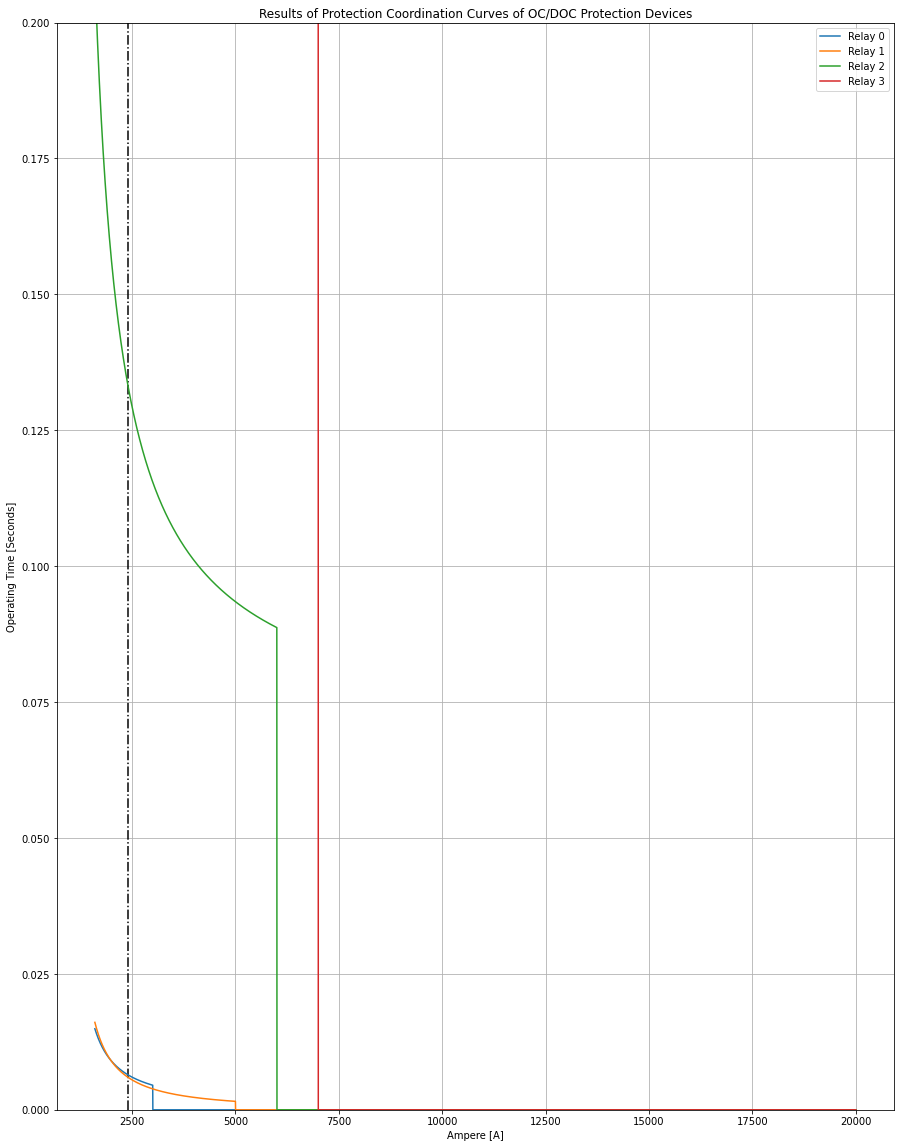

In [ ]:
output_file = Cuckoo_Main(input_file,True)
MaxOpt = 0
gmin = 1.6
gmax = 20
plotI50n = True
nRelay=len(input_file[:,0])
output_file = np.array(output_file)
plt.figure(figsize=(15,20))
for i in range(nRelay):
  Ip = input_file[i,3]
  I51 = input_file[i,4]
  TDS = input_file[i,0]
  A = output_file[0][i][1]
  B = output_file[0][i][2]
  C = output_file[0][i][3]
  I50n = input_file[i,19]
  If = np.linspace(gmin*Ip, gmax*Ip, num=10000)
  t = np.zeros((len(If),1))         # allocate y with float elements
  for j in range(len(If)):
    if (If[j]/Ip)**B < 1:
      continue
    else:
      if ((operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)<50) and (operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)>0)):
        t[j] = operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)
  plt.plot(If,np.array(t).reshape(-1),label=f"Relay {i}")
  MaxOpt = max(MaxOpt,max(t))
plt.vlines(I51,0,MaxOpt[0],linestyles='dashdot')
plt.grid(True)
plt.xlabel('Ampere [A]')
plt.ylabel('Operating Time [Seconds]')
plt.ylim(0,0.2)
plt.title('Results of Protection Coordination Curves of OC/DOC Protection Devices')
plt.legend()
plt.show()

# PSOGSA

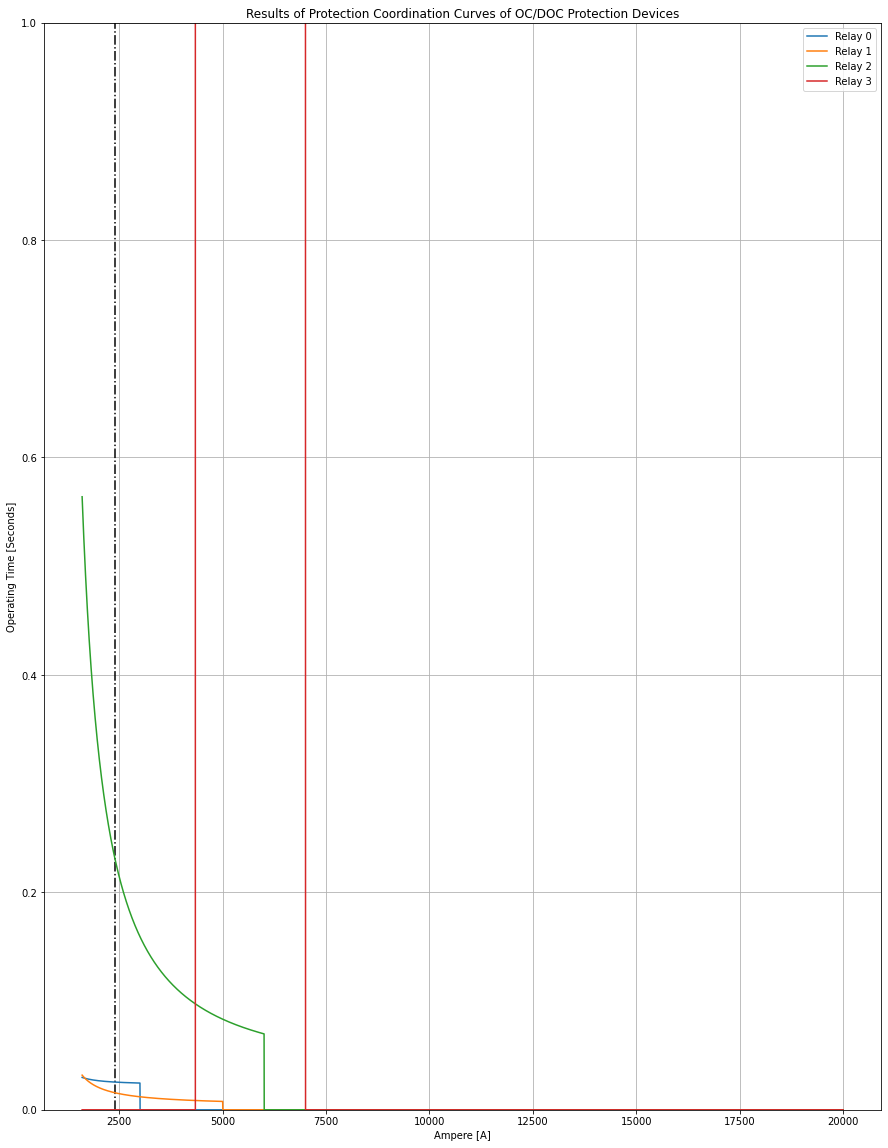

In [ ]:
output_file = PSOGSA_Main(input_file,True)
MaxOpt = 0
gmin = 1.6
gmax = 20
plotI50n = True
nRelay=len(input_file[:,0])
output_file = np.array(output_file)
plt.figure(figsize=(15,20))
for i in range(nRelay):
  Ip = input_file[i,3]
  I51 = input_file[i,4]
  TDS = input_file[i,0]
  A = output_file[0][i][1]
  B = output_file[0][i][2]
  C = output_file[0][i][3]
  I50n = input_file[i,19]
  If = np.linspace(gmin*Ip, gmax*Ip, num=10000)
  t = np.zeros((len(If),1))         # allocate y with float elements
  for j in range(len(If)):
    if (If[j]/Ip)**B < 1:
      continue
    else:
      if ((operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)<50) and (operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)>0)):
        t[j] = operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)
  plt.plot(If,np.array(t).reshape(-1),label=f"Relay {i}")
  MaxOpt = max(MaxOpt,max(t))
plt.vlines(I51,0,MaxOpt[0],linestyles='dashdot')
plt.grid(True)
plt.xlabel('Ampere [A]')
plt.ylabel('Operating Time [Seconds]')
plt.ylim(0,1)
plt.title('Results of Protection Coordination Curves of OC/DOC Protection Devices')
plt.legend()
plt.show()

# GSA

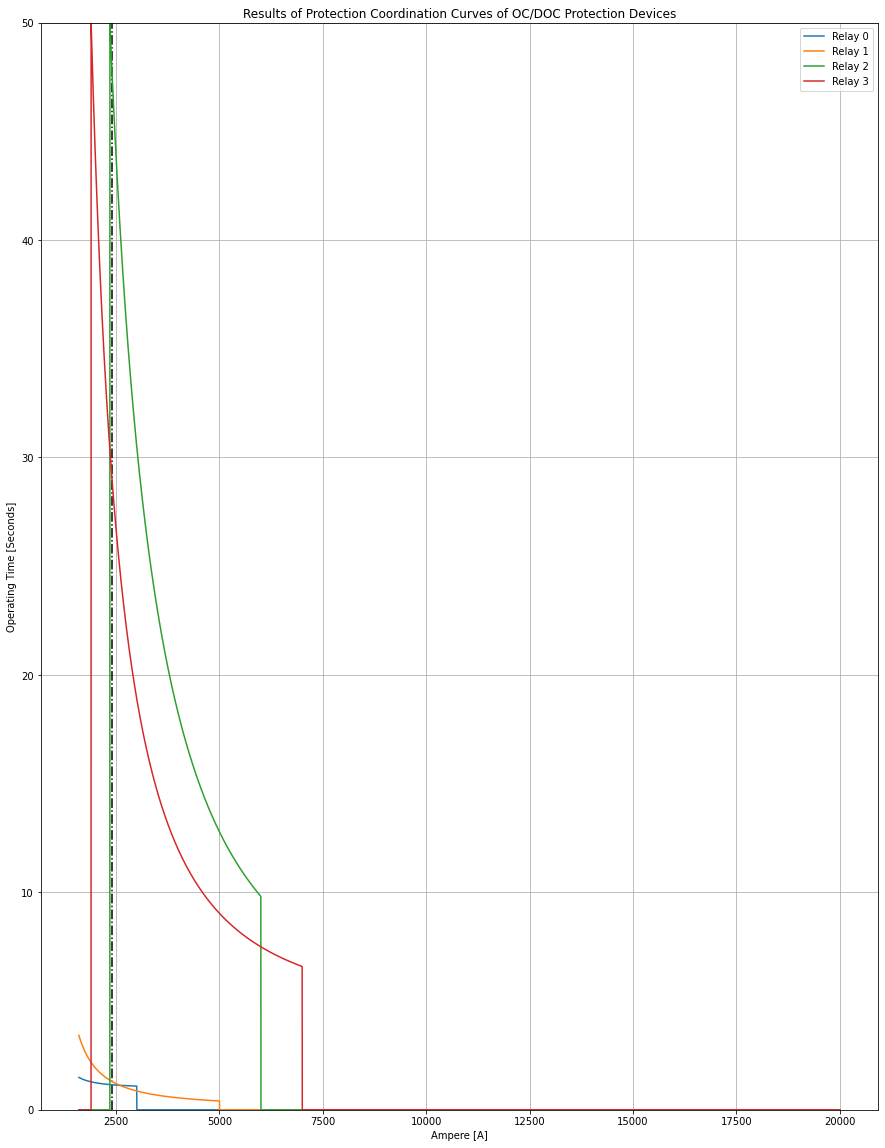

In [ ]:
output_file = GSA_Main(input_file,True)
MaxOpt = 0
gmin = 1.6
gmax = 20
plotI50n = True
nRelay=len(input_file[:,0])
output_file = np.array(output_file)
plt.figure(figsize=(15,20))
for i in range(nRelay):
  Ip = input_file[i,3]
  I51 = input_file[i,4]
  TDS = input_file[i,0]
  A = output_file[0][i][1]
  B = output_file[0][i][2]
  C = output_file[0][i][3]
  I50n = input_file[i,19]
  If = np.linspace(gmin*Ip, gmax*Ip, num=10000)
  t = np.zeros((len(If),1))         # allocate y with float elements
  for j in range(len(If)):
    if (If[j]/Ip)**B < 1:
      continue
    else:
      if ((operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)<50) and (operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)>0)):
        t[j] = operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)
  plt.plot(If,np.array(t).reshape(-1),label=f"Relay {i}")
  MaxOpt = max(MaxOpt,max(t))
plt.vlines(I51,0,MaxOpt[0],linestyles='dashdot')
plt.grid(True)
plt.xlabel('Ampere [A]')
plt.ylabel('Operating Time [Seconds]')
plt.ylim(0,50)
plt.title('Results of Protection Coordination Curves of OC/DOC Protection Devices')
plt.legend()
plt.show()

# PSO

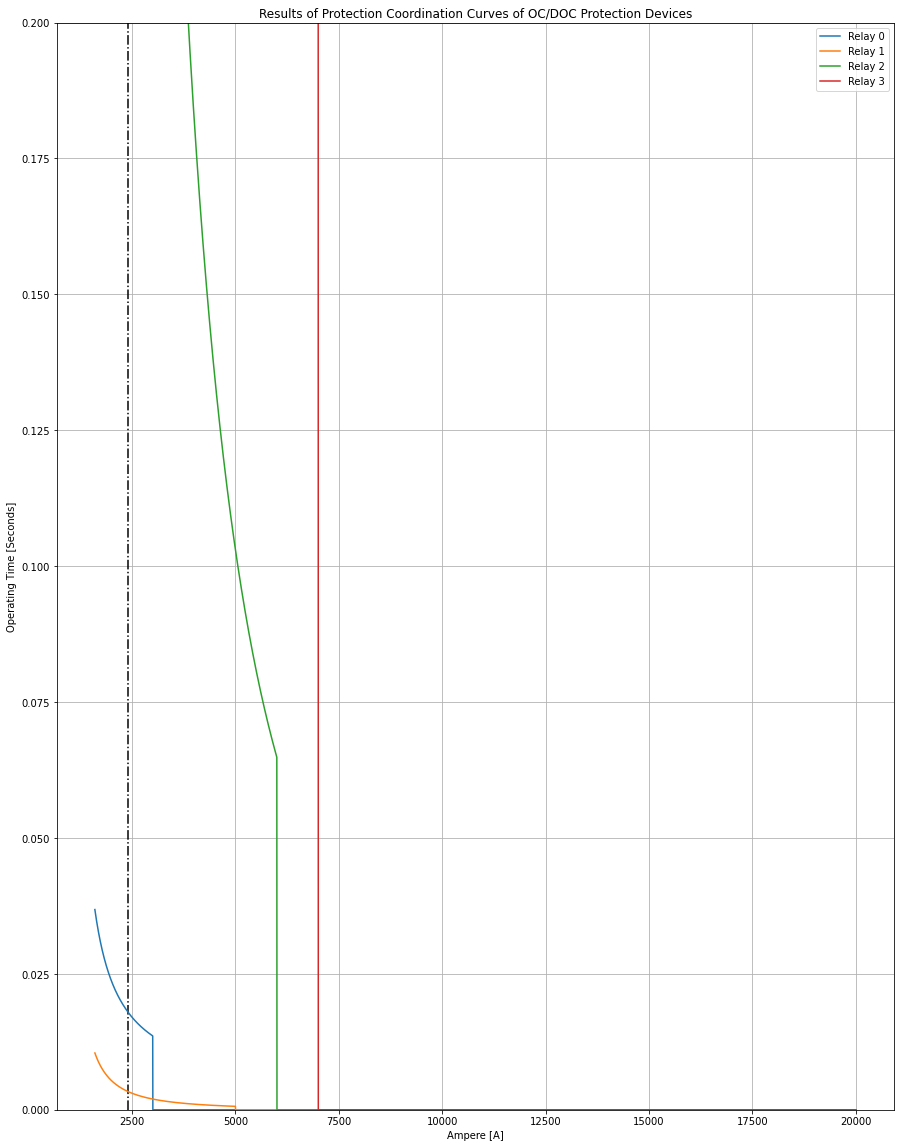

In [ ]:
input_file = np.array(pd.read_csv('inputs.csv'))
output_file = PSO_Main(input_file,PSO_top_functions)
MaxOpt = 0
gmin = 1.6
gmax = 20
plotI50n = True
nRelay=len(input_file[:,0])
output_file = np.array(output_file)
plt.figure(figsize=(15,20))
for i in range(nRelay):
  Ip = input_file[i,3]
  I51 = input_file[i,4]
  TDS = input_file[i,0]
  A = output_file[0][i][1]
  B = output_file[0][i][2]
  C = output_file[0][i][3]
  I50n = input_file[i,19]
  If = np.linspace(gmin*Ip, gmax*Ip, num=10000)
  t = np.zeros((len(If),1))         # allocate y with float elements
  for j in range(len(If)):
    if (If[j]/Ip)**B < 1:
      continue
    else:
      if ((operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)<50) and (operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)>0)):
        t[j] = operatingTimeFuction(If[j],Ip,A,B,C,I50n,TDS,plotI50n)
  plt.plot(If,np.array(t).reshape(-1),label=f"Relay {i}")
  MaxOpt = max(MaxOpt,max(t))
plt.vlines(I51,0,MaxOpt[0],linestyles='dashdot')
plt.grid(True)
plt.xlabel('Ampere [A]')
plt.ylabel('Operating Time [Seconds]')
plt.ylim(0,0.2)
plt.title('Results of Protection Coordination Curves of OC/DOC Protection Devices')
plt.legend()
plt.show()